<a href="https://colab.research.google.com/github/Anu589/Voter-Turnout-Prediction/blob/main/Voter%20Turnout%20Prediction%20Code%20and%20Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# **Voter Turnout Prediction in May 2014 for November 2014 General Election**  
### *Unlocking Patterns in Voter Participation with Data-Driven Insights*  

**Anushka Chakraborty**  
*MSc Data Science*  
*Chennai Mathematical Institute*  

</div>


## 1. Introduction

Voter turnout is a measure of civic participation and best gauges the health of the electoral process according to many experts. The objective of this project is to predict the voter turnout in the General Elections of May 2024, based on previous data, using various Machine Learning techniques.This report details the methodology used for predicting voter turnout using machine learning models. It covers data preprocessing, feature engineering, model selection, hyperparameter tuning, and final model performance evaluation.

The dataset used in this study consists of voter records, containing demographic details, socioeconomic indicators, and past voting behavior. It includes:


- **Number of records:** Approximately 50,000 voter entries.
- **Number of features:** A total of 39 variables, including categorical and numerical attributes.
- **Target variable:** A binary classification variable indicating whether a person voted (1) or did not vote (0) in previous elections.
- **Feature categories:**
  - **Demographic attributes:** Age, ethnicity, marital status, and education level.
  - **Socioeconomic indicators:** Income, net worth, homeownership status, and occupation industry.
  - **Political affiliation:** Party registration (Democratic, Republican, etc.).
  - **Voting history:** Past general and primary election participation.
  - **Precinct-level turnout:** Historical voter turnout rates in the voter’s precinct.


## 2. Libraries and Dependencies

The following libraries and modules are imported to support various operations such as data manipulation, preprocessing, modeling, evaluation, and visualization:

- **pandas:** For data manipulation and analysis.
- **numpy:** For numerical operations and working with arrays.
- **matplotlib.pyplot:** For creating static visualizations.
- **seaborn:** For enhanced visualization, especially statistical plots.
- **geopandas:** For handling geospatial data.
- **plotly.express:** For creating interactive visualizations.
- **pathlib.Path:** For working with file paths.
- **warnings:** To manage warnings and suppress future warnings in the code.
- **sklearn:** For machine learning models, preprocessing, evaluation, and cross-validation. This includes classifiers (e.g., `LogisticRegression`, `RandomForestClassifier`, `SVC`, etc.), preprocessing techniques (`LabelEncoder`, `StandardScaler`, etc.), and performance metrics (`accuracy_score`, `f1_score`, `roc_auc_score`, etc.).



In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from pathlib import Path
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import (
    StratifiedKFold,
    train_test_split,
    cross_val_score,
    GridSearchCV
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, roc_curve, auc, precision_recall_curve



### 3. Plotting Configuration

The following settings are used for visual consistency across plots:
- Font size is set to 14 for the main content, and 10 for tick labels.
- Axis labels and titles are set to a font size of 14 for clear readability.
- The legend and axis ticks are styled to improve plot presentation.

In [53]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Image Saving Path

An image directory (`IMAGES_PATH`) is created to save generated visualizations. The folder path is set as `"images bank"`, and the script ensures it exists using `mkdir(parents=True, exist_ok=True)`.

### Function for Saving Figures

The `save_fig` function allows the saving of plots with customized parameters:
- `fig_id`: The name of the image file.
- `tight_layout`: Option to ensure the layout is optimized for saving.
- `fig_extension`: The image format (default is PNG).
- `resolution`: The DPI (dots per inch) resolution for the image.

In [54]:
IMAGES_PATH = Path() / "images bank"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
 path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
 if tight_layout:
  plt.tight_layout()
 plt.savefig(path, format=fig_extension, dpi=resolution)

## 4. Data Preprocessing

### 4.1 Data Loading
- The dataset is loaded from a CSV file using the following command:

In [55]:
url="/content/voterfile .csv"

In [56]:
df=pd.read_csv(url)

###4.2 Initial Data Inspection
- The dataset is loaded and basic information about it is displayed using:

In [57]:
df

,optimus_id,age,party,ethnicity,maritalstatus,dwellingtype,income,education,cd,dma,...,intrst_musical_instruments_in_hh,donates_to_liberal_causes,donates_to_conservative_causes,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,Republican,European,Married,Single Family Dwelling Unit,75k-125k,Bach Degree - Extremely Likely,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,Likely Homeowner,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,American Independent,European,NaN,NaN,Unknown,NaN,2.0,RENO DMA (EST.),...,NaN,NaN,NaN,NaN,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,Non-Partisan,European,NaN,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,American Independent,European,Married,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,Democratic,NaN,NaN,NaN,Unknown,NaN,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.71,0.66,0.81,0.19,0.37,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,251398,23.0,American Independent,European,NaN,Single Family Dwelling Unit,125k-200k,Some College -Extremely Likely,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,Likely Homeowner,0.68,0.56,0.77,0.12,0.22,0.12
49996,684299,24.0,Democratic,NaN,NaN,Small Mult or large mult w/apt number,35k-75k,Some College - Likely,1.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,Likely Homeowner,0.50,0.38,0.67,0.05,0.09,0.06
49997,369815,28.0,Non-Partisan,European,NaN,Small Mult or large mult w/apt number,35k-75k,HS Diploma - Likely,1.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.45,0.31,0.58,0.07,0.10,0.08
49998,276455,49.0,Republican,European,NaN,Small Mult or large mult w/apt number,75k-125k,HS Diploma - Extremely Likely,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.52,0.35,0.68,0.06,0.10,0.06


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   optimus_id                        50000 non-null  int64  
 1   age                               49983 non-null  float64
 2   party                             50000 non-null  object 
 3   ethnicity                         44808 non-null  object 
 4   maritalstatus                     19362 non-null  object 
 5   dwellingtype                      23917 non-null  object 
 6   income                            50000 non-null  object 
 7   education                         27590 non-null  object 
 8   cd                                49996 non-null  float64
 9   dma                               50000 non-null  object 
 10  occupationindustry                8192 non-null   object 
 11  vh14p                             50000 non-null  int64  
 12  vh12

###4.3 Handling Missing Data

#### 4.3.1. Remove Columns with High Missing Data
In this step, we remove columns where the number of missing values exceeds 10% of the total data. We calculate the threshold for missing data as follows: $CI = 0.10 \times \text{len(df)}$


In [59]:
CI=0.10*len(df)

Then, we drop columns where the number of missing values is greater than this threshold:

In [60]:
df = df.dropna(thresh=CI, axis=1)

This ensures that columns with excessive missing data do not introduce noise into the model.

####4.3.2 Filling Missing Values in Age

The `age` column is a continuous numerical variable representing an individual's age. Since age follows a natural distribution, we replace missing values with the **median**:


In [61]:
df["age"] = df["age"].fillna(df["age"].median())

<ipython-input-61-7906083ce4e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].fillna(df["age"].median())


#### 4.3.3.Filling Missing Values in cd (Congressional District)

The cd column represents congressional district numbers. Since district numbers are categorical but represented numerically, we fill missing values with the median:

In [62]:
df['cd'].fillna(df['cd'].median(), inplace=True)

<ipython-input-62-c9270bcfc85d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cd'].fillna(df['cd'].median(), inplace=True)


####4.3.4. Filling Missing Values in Precinct Turnout Features
The dataset contains multiple features representing precinct-level voter turnout in different election years:

- g08_precinct_turnout (General Election 2008)
- g10_precinct_turnout (General Election 2010)
- g12_precinct_turnout (General Election 2012)
- p08_precinct_turnout (Primary Election 2008)
- p10_precinct_turnout (Primary Election 2010)
- p12_precinct_turnout (Primary Election 2012)

Since these variables represent average turnout rates within precincts, missing values are imputed using the mean:

In [63]:
tc = ["g08_precinct_turnout", "g10_precinct_turnout", "g12_precinct_turnout",
                "p08_precinct_turnout", "p10_precinct_turnout", "p12_precinct_turnout"]
df[tc] = df[tc].fillna(df[tc].mean())


<ipython-input-63-b5886f057c7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[tc] = df[tc].fillna(df[tc].mean())


4.3.5. *Check* for the unique values in object columns with type object

In [64]:
c=1
for i in df.select_dtypes(include=['object']).columns:
  print(f"{c}. Unique values in column '{i}':",df[i].unique())
  c+=1

1. Unique values in column 'party': ['Republican' 'American Independent' 'Non-Partisan' 'Democratic' 'Other'
 'Libertarian' 'Green' 'Natural Law']
2. Unique values in column 'ethnicity': ['European' nan 'African-American' 'Asian' 'Hispanic' 'Other']
3. Unique values in column 'maritalstatus': ['Married' nan 'Non-Traditional']
4. Unique values in column 'dwellingtype': ['Single Family Dwelling Unit' nan 'Small Mult or large mult w/apt number'
 'Large mult wo/Apt number']
5. Unique values in column 'income': ['75k-125k' 'Unknown' '35k-75k' '200k+' '0-35k' '125k-200k']
6. Unique values in column 'education': ['Bach Degree - Extremely Likely' nan 'HS Diploma - Likely'
 'HS Diploma - Extremely Likely' 'Some College - Likely'
 'Bach Degree - Likely' 'Grad Degree - Extremely Likely'
 'Some College -Extremely Likely' 'Less than HS Diploma - Likely'
 'Grad Degree - Likely' 'Vocational Technical Degree - Extremely Likely'
 'Less than HS Diploma - Ex Like']
7. Unique values in column 'dma': ['LAS

###4.3.3. Handling Categorical Data

Categorical data needs to be converted into numerical format to be used in machine learning models. The dataset includes multiple categorical features, which require different encoding techniques based on their nature and usage.

####  - Ordinal Encoding
Certain categorical variables have an inherent order, meaning that the categories represent different levels of a certain characteristic. For such variables, **Ordinal Encoding** is applied.
The following categorical columns are encoded using **Ordinal Encoding**:
- `party`
- `ethnicity`
- `dma`
- `dwellingtype`
- `occupationindustry`
- `maritalstatus`

Before encoding, missing values in these columns are replaced with `"Unknown"` to ensure uniformity:

In [65]:
categorical_columns = ["party", "ethnicity", "dma", "dwellingtype", "occupationindustry", "maritalstatus"]

df = df.copy()

df[categorical_columns] = df[categorical_columns].fillna("Unknown")


encoder = OrdinalEncoder()
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   optimus_id            50000 non-null  int64  
 1   age                   50000 non-null  float64
 2   party                 50000 non-null  float64
 3   ethnicity             50000 non-null  float64
 4   maritalstatus         50000 non-null  float64
 5   dwellingtype          50000 non-null  float64
 6   income                50000 non-null  object 
 7   education             27590 non-null  object 
 8   cd                    50000 non-null  float64
 9   dma                   50000 non-null  float64
 10  occupationindustry    50000 non-null  float64
 11  vh14p                 50000 non-null  int64  
 12  vh12g                 50000 non-null  int64  
 13  vh12p                 50000 non-null  int64  
 14  vh10g                 50000 non-null  int64  
 15  vh10p              

####- Mapping Ordinal Variables

Some features, such as education, income,education, and net_worth, have an explicit hierarchy in their values. To reflect this ordering, we manually define mappings for each category.

In [66]:
education_map = {
    "Less than HS Diploma - Likely": 1,
    "Less than HS Diploma - Ex Like": 2,
    "HS Diploma - Likely": 3,
    "HS Diploma - Extremely Likely": 4,
    "Some College - Likely": 5,
    "Some College -Extremely Likely": 6,
    "Vocational Technical Degree - Extremely Likely": 7,
    "Bach Degree - Likely": 8,
    "Bach Degree - Extremely Likely": 9,
    "Grad Degree - Likely": 10,
    "Grad Degree - Extremely Likely": 11
}

df['education'] = df['education'].map(education_map)
df['education'] = df['education'].fillna(df['education'].median())  # Fill NaN with median value


In [67]:
income = {
    "0-35k": 1,
    "35k-75k": 2,
    "75k-125k": 3,
    "125k-200k": 4,
    "200k+": 5,
    "Unknown": np.nan
}

df["income"] = df["income"].map(income)


df["income"] = df["income"].fillna(df["income"].median()) # Fill NaN with median value


In [68]:
net_worth_map = {
    "$1-4999": 1,
    "$5000-9999": 2,
    "$10000-24999": 3,
    "$25000-49999": 4,
    "$50000-99999": 5,
    "$100000-249999": 6,
    "$250000-499999": 7,
    "$499999+": 8
}

df['net_worth'] = df['net_worth'].map(net_worth_map)
df['net_worth'] = df['net_worth'].fillna(df['net_worth'].median())  # Fill NaN with median value


#### - Binary Encoding

Some categorical variables have only two possible values (binary categories). These are converted into 0s and 1s.

In [69]:
df['home_owner_or_renter'] = df['home_owner_or_renter'].map({'Likely Homeowner': 1, 'Likely Renter': 0})
df['home_owner_or_renter'] = df['home_owner_or_renter'].fillna(df['home_owner_or_renter'].mode()[0])  # Fill NaN with mode


#### - Boolean to Integer Conversion
The dataset contains some boolean columns (True/False values), which need to be converted to numerical format:

In [70]:
for i in df.select_dtypes(include="bool").columns:
    df[i] = df[i].astype(int)

- After performing all the encoding steps, we verify the data structure:

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   optimus_id            50000 non-null  int64  
 1   age                   50000 non-null  float64
 2   party                 50000 non-null  float64
 3   ethnicity             50000 non-null  float64
 4   maritalstatus         50000 non-null  float64
 5   dwellingtype          50000 non-null  float64
 6   income                50000 non-null  float64
 7   education             50000 non-null  float64
 8   cd                    50000 non-null  float64
 9   dma                   50000 non-null  float64
 10  occupationindustry    50000 non-null  float64
 11  vh14p                 50000 non-null  int64  
 12  vh12g                 50000 non-null  int64  
 13  vh12p                 50000 non-null  int64  
 14  vh10g                 50000 non-null  int64  
 15  vh10p              

### 5. Exploratory Data Analysis

####5.1. Correlation Heatmap
- A correlation matrix is computed to analyze the relationships between features.

- A heatmap is generated to visualize the correlation between features.

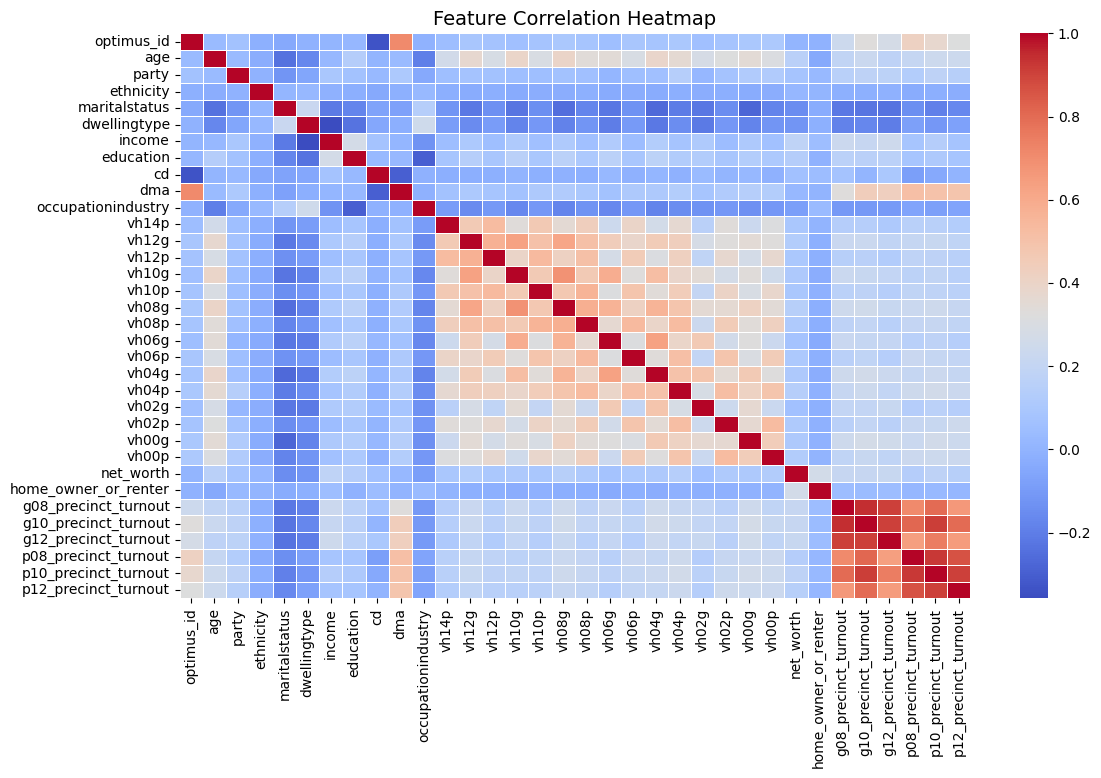

In [72]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
save_fig("feature_correlation_heatmap")
plt.show()


**Insights from Correlation Heatmap**

 1. **Strong Correlation Among Voter History Features**
   - Features like `vh12g`, `vh10g`, `vh08g`, etc., show **strong positive correlations**, indicating that past general election participation is a good predictor of future voting behavior.
   - Similarly, `vh12p`, `vh10p`, `vh08p`, etc., for **primary elections** show a similar pattern.

 2. **Precinct Turnout Correlation**
   - `g08_precinct_turnout`, `g10_precinct_turnout`, and `g12_precinct_turnout` are highly correlated, suggesting **consistent precinct-level voting trends over multiple election cycles**.
   - A similar trend is visible for **primary election turnout**.

 3. **Minimal Correlation Between Demographics and Voting Behavior**
   - **Age** and **income** show weak correlation with voter history, indicating that **demographics alone do not strongly predict voting patterns**.
   - `party` (political affiliation) does not exhibit strong correlation with past voter turnout.

 4. **Low Correlation Between Socioeconomic Factors and Voting**
   - Attributes such as `net_worth`, `education`, and `home_owner_or_renter` do not show significant correlation with voter history.
   - This suggests that **socioeconomic status alone is not a decisive factor in voter turnout**.


In [73]:
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns
                   if i != j and abs(corr_matrix[i][j]) > 0.8]

print("Highly Correlated Features (> 0.9):")
for pair in high_corr_pairs:
    print(pair)

Highly Correlated Features (> 0.9):
('g08_precinct_turnout', 'g10_precinct_turnout')
('g08_precinct_turnout', 'g12_precinct_turnout')
('g08_precinct_turnout', 'p10_precinct_turnout')
('g10_precinct_turnout', 'g08_precinct_turnout')
('g10_precinct_turnout', 'g12_precinct_turnout')
('g10_precinct_turnout', 'p08_precinct_turnout')
('g10_precinct_turnout', 'p10_precinct_turnout')
('g10_precinct_turnout', 'p12_precinct_turnout')
('g12_precinct_turnout', 'g08_precinct_turnout')
('g12_precinct_turnout', 'g10_precinct_turnout')
('p08_precinct_turnout', 'g10_precinct_turnout')
('p08_precinct_turnout', 'p10_precinct_turnout')
('p08_precinct_turnout', 'p12_precinct_turnout')
('p10_precinct_turnout', 'g08_precinct_turnout')
('p10_precinct_turnout', 'g10_precinct_turnout')
('p10_precinct_turnout', 'p08_precinct_turnout')
('p10_precinct_turnout', 'p12_precinct_turnout')
('p12_precinct_turnout', 'g10_precinct_turnout')
('p12_precinct_turnout', 'p08_precinct_turnout')
('p12_precinct_turnout', 'p10_pre

- The goal of this step is to identify pairs of features that have a high correlation (above 0.8). Highly correlated features may indicate **redundancy** in the dataset, which can affect model performance and lead to multicollinearity.


####5.2 Pairplot Analysis of Selected Features

The pairplot is used to visualize the relationships and distributions of key features, including income, age, DMA, and voter history (vhXXg, vhXXp), to uncover potential patterns or correlations.

Key Features in Analysis:

- Demographic Factors: income, age, dma

- Voter History: vh14p, vh12g, vh12p, vh10g, vh10p, vh08g, vh08p, vh06g, vh06p, vh04g, vh04p, vh02g, vh02p, vh00g, vh00p

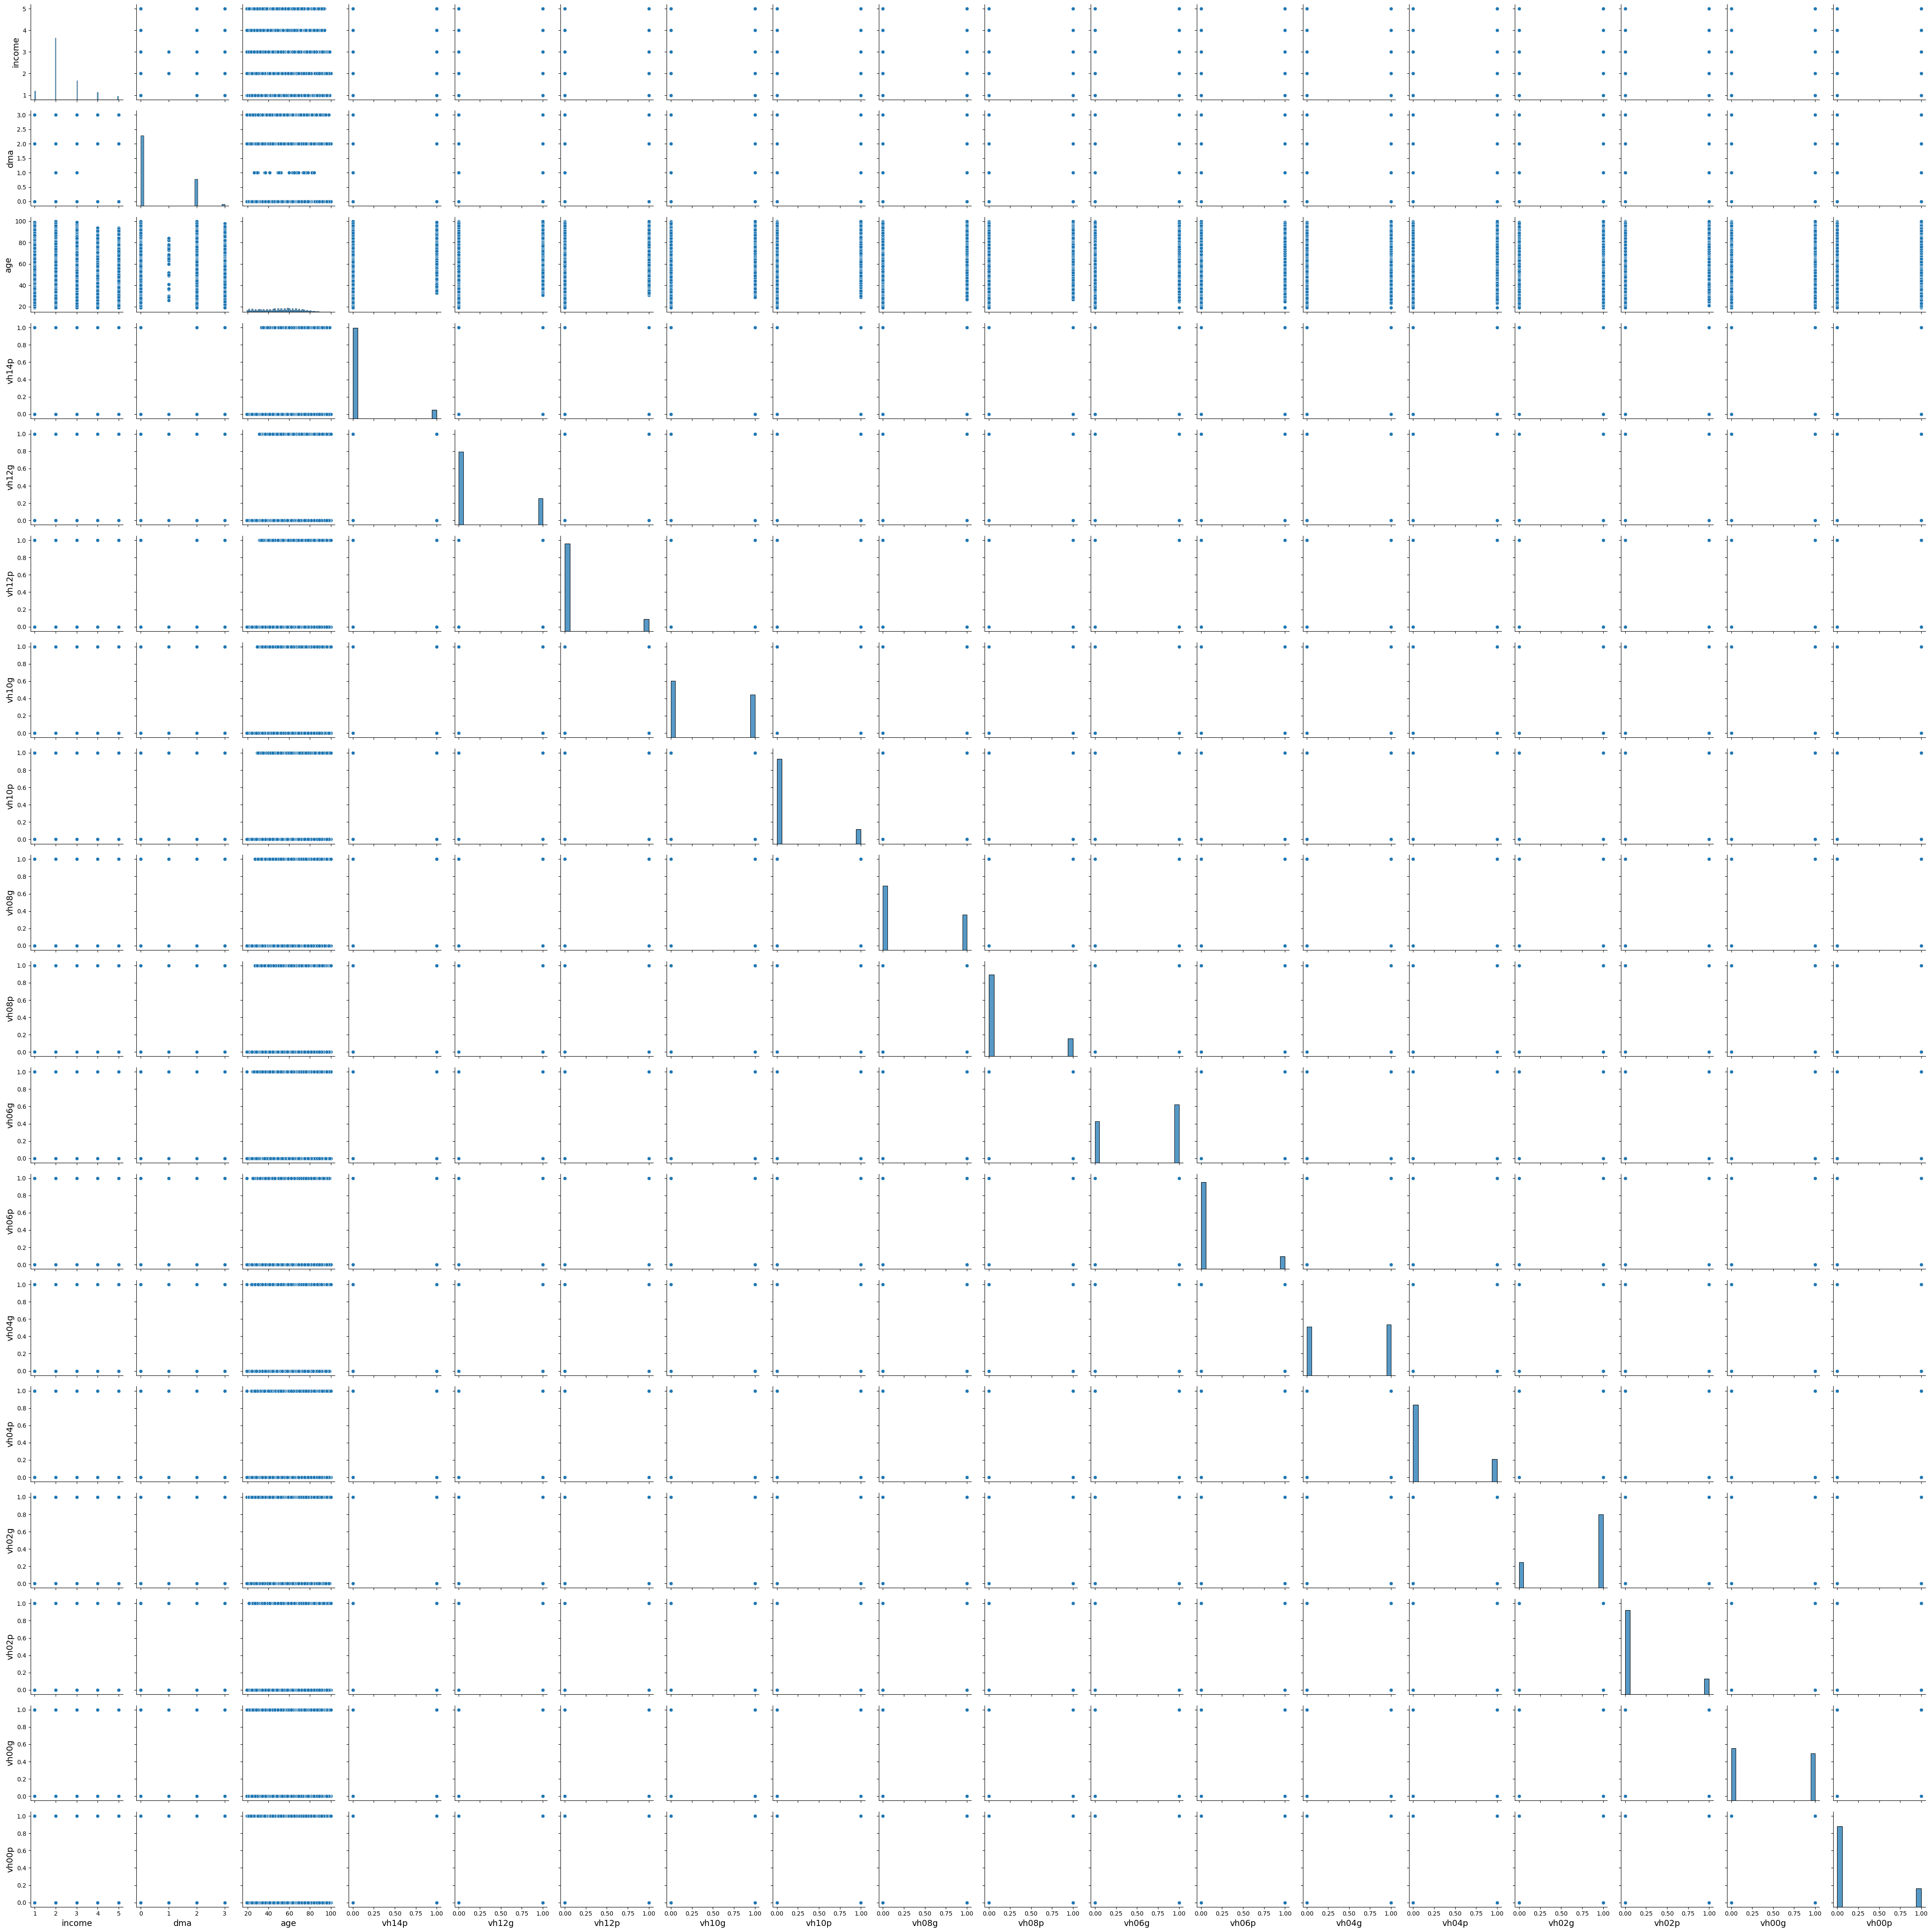

In [74]:
selected_features = ["income","dma","age","vh14p", "vh12g", "vh12p", "vh10g", "vh10p",
               "vh08g", "vh08p", "vh06g", "vh06p", "vh04g",
               "vh04p", "vh02g", "vh02p", "vh00g", "vh00p"]

sns.pairplot(df[selected_features])
save_fig("pairplot")
plt.show()

**Insights from pairplot**
 **1. Correlation Between Voter History (`vhXXg`, `vhXXp`)**
- Strong positive correlation between past general elections (`vh12g`, `vh10g`, `vh08g`, etc.).
- Primary election participation (`vh12p`, `vh10p`, `vh08p`, etc.) follows a similar trend.
- Suggests that past voter behavior is a strong predictor of future voting patterns.

 **2. Limited Variability in Some Features**
- Some variables exhibit sparse distributions, indicating low variance.
- This could suggest that certain voter history features have a dominant category (e.g., voters consistently participating or abstaining).

 **3. Presence of Discrete Voting Patterns**
- Voting history is categorical (voted or not) rather than continuous.
- The plots show a clear separation rather than a smooth trend.

**Key Takeaways**
- Age appears to have a mild positive correlation with voting behavior.
- Income does not show a strong relationship with voter participation.
- DMA influences voter turnout, indicating the need for a geographic-based analysis of voting patterns.


###5.3 Distribution of Categorical Features
This visualization provides an insight into the distribution of various categorical features in the dataset. It helps in understanding the frequency of different categories within each feature, which is essential for data preprocessing and feature engineering.


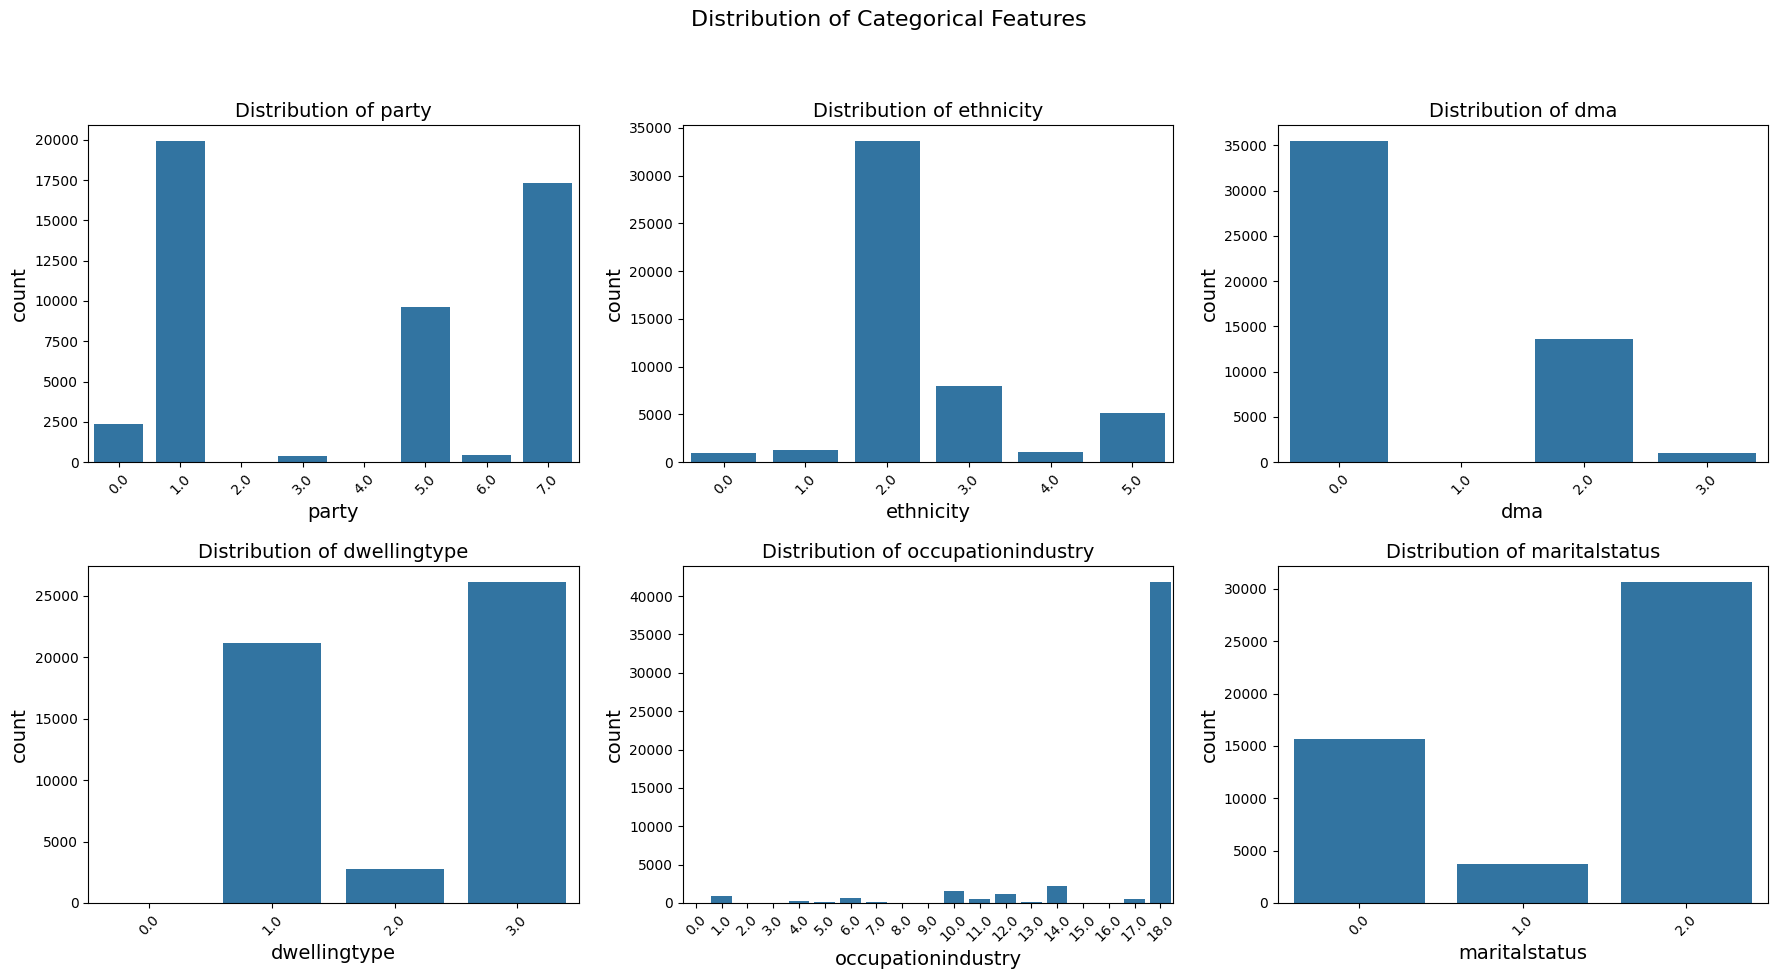

In [75]:
categorical_columns = ["party", "ethnicity", "dma", "dwellingtype", "occupationindustry", "maritalstatus"]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Distribution of Categorical Features", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig(IMAGES_PATH / f"distribution of category features.png", dpi=300)
plt.show()

**Insights from the Categorical Feature Distributions**

- **Party Affiliation**: The dataset is dominated by two major categories, with a few smaller groups having significantly lower representation.  
- **Ethnicity**: One particular ethnic group is highly overrepresented compared to others.  
- **DMA (Designated Market Area)**: The majority of data points belong to a single DMA category, while the remaining categories have significantly fewer observations.  
- **Dwelling Type**: Two primary dwelling types make up most of the dataset, with other categories having minimal representation.  
- **Occupation Industry**: One occupation industry category is overwhelmingly dominant, while the rest are sparsely distributed.  
- **Marital Status**: There is a strong presence of one marital status category, with other categories having relatively smaller counts.  


####5.4 Voter Turnout Trends Over Time  

This visualization represents the average voter turnout across different years, using the following columns:  
- **vh00g** (Voter turnout in 2000)  
- **vh02g** (Voter turnout in 2002)  
- **vh04g** (Voter turnout in 2004)  
- **vh06g** (Voter turnout in 2006)  
- **vh08g** (Voter turnout in 2008)  
- **vh10g** (Voter turnout in 2010)  
- **vh12g** (Voter turnout in 2012)  

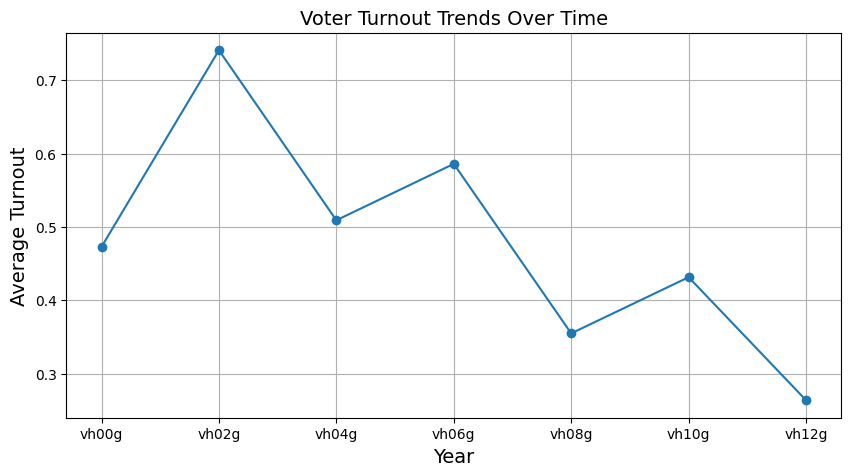

In [76]:
turnout_cols = ["vh00g", "vh02g", "vh04g", "vh06g", "vh08g", "vh10g", "vh12g"]
df[turnout_cols].mean().plot(kind='line', marker='o', figsize=(10, 5), title="Voter Turnout Trends Over Time")
plt.ylabel("Average Turnout")
plt.xlabel("Year")
plt.grid()
fig.savefig(IMAGES_PATH / f"voter turnout over time", dpi=300)
plt.show()

**Insights**
- **Peak in 2002**: The highest voter turnout was recorded in 2002.
- **Decline After 2002**: A noticeable decline followed in 2004, indicating a drop in voter participation.
- **Slight Recovery in 2006**: Turnout increased again in 2006 before declining in 2008.
- **Steady Drop in 2008 and 2012**: The lowest turnout was observed in 2012, continuing the downward trend.
- **Fluctuating Pattern**: Turnout rates do not follow a linear trend, indicating variability in voter engagement across different years.
- **Potential Influences**: Political, economic, or social factors may have contributed to the observed turnout changes.


#### 5.4 Age Distribution by Party

This visualization represents the distribution of age across different political parties using a violin plot. The violin plot helps in understanding the density and spread of age within each party category.


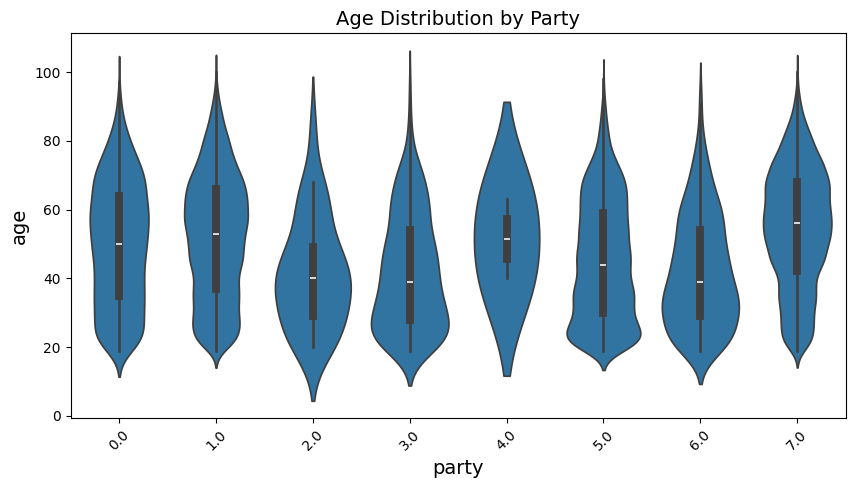

In [77]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="party", y="age", data=df)
plt.xticks(rotation=45)
plt.title("Age Distribution by Party")
fig.savefig(IMAGES_PATH / f"box plot of turnout in 2012 vs income.png", dpi=300)
plt.show()

**Insights from Age Distribution by Party**

- **Age Spread Across Parties**: Each party shows a wide distribution of ages, indicating diverse voter demographics.
- **Median Age Differences**: Some parties have a slightly higher median age, suggesting an older voter base.
- **Density Variations**: Certain parties show a higher density of younger voters, while others have a more even spread.
- **Presence of Outliers**: Some extreme values indicate a few exceptionally young or old voters in each party.
- **Comparative Age Distributions**: While some parties have a more compact distribution, others show a broader spread, highlighting variations in voter demographics.


#### 5.5 Income Distribution by Party

This visualization represents the distribution of income across different political parties using a violin plot. It combines aspects of a box plot with a density estimation, providing insights into the spread and concentration of income levels within each party.


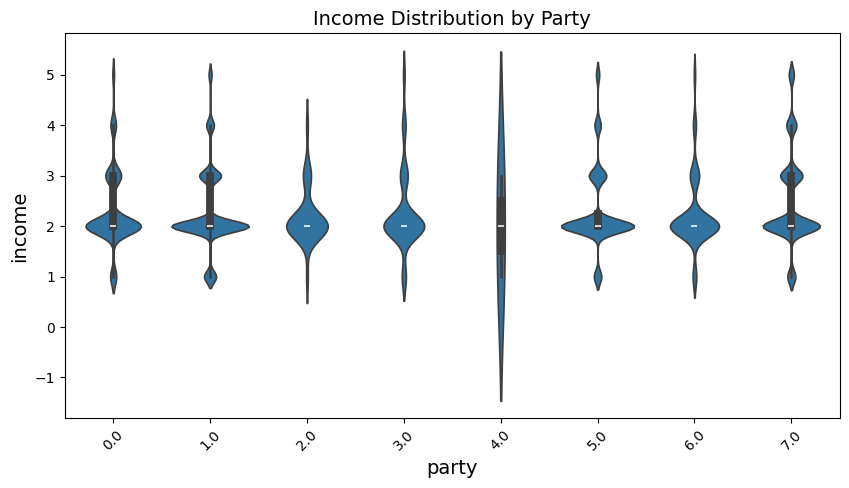

In [78]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="party", y="income", data=df)
plt.xticks(rotation=45)
plt.title("Income Distribution by Party")
fig.savefig(IMAGES_PATH / f"violin plot of party vs age.png", dpi=300)
plt.show()

**Insights from Income Distribution by Party**

- **Income Distribution Variability**: Each party exhibits different spreads of income, with some having a more concentrated distribution while others display a wider range.
- **Median Income Differences**: The central white dot in each violin plot suggests the median income, which varies slightly across different parties.
- **Density Clustering**: Some parties have a higher density of individuals within a specific income range, indicating that income levels are more concentrated for certain groups.
- **Outliers and Extremes**: Some parties show extreme values in income distribution, suggesting the presence of high-income and low-income individuals.
- **Comparative Party Analysis**: The distribution shapes reveal how income levels differ between political parties, which may provide insights into the economic backgrounds of their supporters.


#### 5.6 Distribution of 2012 General Election Turnout Across DMAs


This visualization represents the distribution of voter turnout in the 2012 General Election across different DMAs (Designated Market Areas). The boxplot helps identify variations in turnout, potential outliers, and regional voting trends.


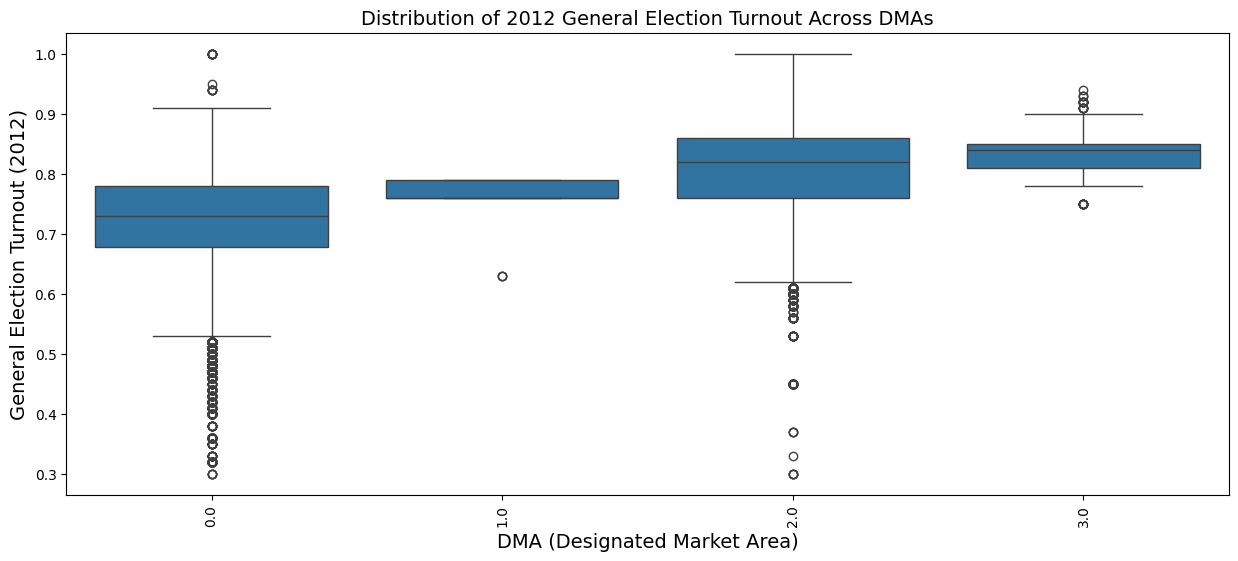

In [79]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="dma", y="g12_precinct_turnout", data=df)
plt.xticks(rotation=90)
plt.xlabel("DMA (Designated Market Area)")
plt.ylabel("General Election Turnout (2012)")
plt.title("Distribution of 2012 General Election Turnout Across DMAs")
fig.savefig(IMAGES_PATH / f"Distribution of 2012 General Election Turnout Across DMAs", dpi=300)
plt.show()


**Insights from the Distribution of 2012 General Election Turnout Across DMAs**

- **Variation Across DMAs**: Different DMAs exhibit varying levels of voter turnout, indicating regional differences in voter engagement.
- **Median Differences**: The median turnout is not uniform across DMAs, suggesting certain areas have consistently higher participation.
- **Presence of Outliers**: Some DMAs have significant outliers, representing precincts with extremely high or low voter turnout.
- **Interquartile Range (IQR) Differences**: Some DMAs have a wider IQR, indicating greater variation in turnout within the region.
- **Skewness in Some DMAs**: Certain DMAs display skewed distributions, with a higher concentration of precincts either below or above the median turnout.


### 6. Feature Engineering

#### 6.1Log Transformations
- Created `log_income` and `log_net_worth` to normalize skewed distributions using logarithmic transformation.


In [80]:
df["log_income"] = np.log1p(df["income"])
df["log_net_worth"] = np.log1p(df["net_worth"])

#### 6.2 Socioeconomic Index
- Derived a composite socioeconomic index:
  - **Income (50%)**
  - **Education (30%)**
  - **Net Worth (20%)**

In [81]:
df['socioeconomic_index'] = (df['income'] * 0.5) + (df['education'] * 0.3) + (df['net_worth'] * 0.2)


#### 6.3 Dimensionality Reduction
- Standardized correlated voter turnout features.
- Applied **Principal Component Analysis (PCA)** to reduce multicollinearity and extract a single principal component (`g_pca`).
- Dropped the original turnout-related features to avoid redundancy.


In [82]:
correlated_features = ["g08_precinct_turnout", "g10_precinct_turnout", "g12_precinct_turnout",
                                     "p08_precinct_turnout", "p10_precinct_turnout", "p12_precinct_turnout"]

scaler = StandardScaler()
df[correlated_features] = scaler.fit_transform(df[correlated_features])

pca = PCA(n_components=1)
df['g_pca'] = pca.fit_transform(df[correlated_features])


df.drop(columns=correlated_features, inplace=True)

In [83]:
df=df.drop(columns=['income','net_worth'])

- - Removed **income** and **net worth** after incorporating them into engineered features.

In [84]:
df

,optimus_id,age,party,ethnicity,maritalstatus,dwellingtype,education,cd,dma,occupationindustry,...,vh04p,vh02g,vh02p,vh00g,vh00p,home_owner_or_renter,log_income,log_net_worth,socioeconomic_index,g_pca
0,861681,69.0,7.0,2.0,0.0,1.0,9.0,4.0,0.0,12.0,...,0,1,0,1,0,1.0,1.386294,1.945910,5.4,0.763442
1,1084850,20.0,0.0,2.0,2.0,3.0,5.0,2.0,2.0,18.0,...,0,0,0,0,0,1.0,1.098612,1.945910,3.7,7.145249
2,644435,28.0,5.0,2.0,2.0,3.0,5.0,3.0,0.0,18.0,...,0,0,0,0,0,1.0,1.098612,2.079442,3.9,-2.726081
3,57683,78.0,0.0,2.0,0.0,3.0,5.0,3.0,0.0,18.0,...,0,0,0,0,0,1.0,1.098612,1.945910,3.7,4.446443
4,167371,68.0,1.0,5.0,2.0,3.0,5.0,4.0,0.0,18.0,...,1,1,1,1,1,1.0,1.098612,1.945910,3.7,2.712344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,251398,23.0,0.0,2.0,2.0,1.0,6.0,3.0,0.0,18.0,...,0,1,0,0,0,1.0,1.609438,1.945910,5.0,0.166260
49996,684299,24.0,1.0,5.0,2.0,2.0,5.0,1.0,0.0,18.0,...,0,1,0,0,0,1.0,1.098612,1.945910,3.7,-2.630784
49997,369815,28.0,5.0,2.0,2.0,2.0,3.0,1.0,0.0,18.0,...,0,0,0,1,0,1.0,1.098612,1.945910,3.1,-3.189251
49998,276455,49.0,7.0,2.0,2.0,2.0,4.0,4.0,0.0,18.0,...,0,1,1,1,0,1.0,1.386294,2.079442,4.1,-2.526967


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   optimus_id            50000 non-null  int64  
 1   age                   50000 non-null  float64
 2   party                 50000 non-null  float64
 3   ethnicity             50000 non-null  float64
 4   maritalstatus         50000 non-null  float64
 5   dwellingtype          50000 non-null  float64
 6   education             50000 non-null  float64
 7   cd                    50000 non-null  float64
 8   dma                   50000 non-null  float64
 9   occupationindustry    50000 non-null  float64
 10  vh14p                 50000 non-null  int64  
 11  vh12g                 50000 non-null  int64  
 12  vh12p                 50000 non-null  int64  
 13  vh10g                 50000 non-null  int64  
 14  vh10p                 50000 non-null  int64  
 15  vh08g              

##7. Model Training & Selection (comparison of classifiers)

####7.1 Extract the target feature

In [86]:
X = df.drop(columns=['vh14p'])
y = df['vh14p']

####7.2 Train-Test Split
- Split dataset into **80% training** and **20% testing**.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####7.3 Model Scaling
- Standardized feature values using **StandardScaler** for better model performance.

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####7.4 Classifier Comparison
- Compared the performance of four models:
  1. **Logistic Regression**
  2. **Random Forest**
  3. **XGBoost**
  4. **LightGBM**

In [89]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

####7.5 Metrics used for evaluation:
  - **Accuracy**
  - **AUC-ROC (Area Under Curve - Receiver Operating Characteristic)**
  - **F1-Score**

- Results stored in a Pandas DataFrame for easy comparison.

In [90]:
results = {}


for name, model in models.items():
    print(f"\nTraining {name}...")


    model.fit(X_train_scaled, y_train)


    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]


    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    f1 = f1_score(y_test, y_pred)

    results[name] = {"Accuracy": accuracy, "AUC-ROC": auc_roc, "F1-Score": f1}

    print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {auc_roc:.4f}, F1-Score: {f1:.4f}")

results_df = pd.DataFrame(results).T

print("\nModel Performance Comparison:")
print(results_df)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.9367, AUC-ROC: 0.9423, F1-Score: 0.5755

Training Random Forest...
Random Forest - Accuracy: 0.9369, AUC-ROC: 0.9411, F1-Score: 0.5639

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:10:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9368, AUC-ROC: 0.9402, F1-Score: 0.5747

Training LightGBM...
[LightGBM] [Info] Number of positive: 3531, number of negative: 36469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088275 -> initscore=-2.334881
[LightGBM] [Info] Start training from score -2.334881
LightGBM - Accuracy: 0.9389, AUC-ROC: 0.9475, F1-Score: 0.5902

Model Performance Comparison:
                     Accuracy   AUC-ROC  F1-Score
Logistic Regression    0.9367  0.942258  0.575453
Random Forest          0.9369  0.941073  0.563925
XGBoost                0.9368  0.940157  0.574697
LightGBM               0.9389  0.947528  0.590208


####7.6 Precision-Recall Curve

- Plotted the **Precision-Recall Curve** for each classifier to visualize model trade-offs.
- Helps in understanding the balance between precision (avoiding false positives) and recall (minimizing false negatives).
- Models with curves closer to the top-right corner perform better in classification.

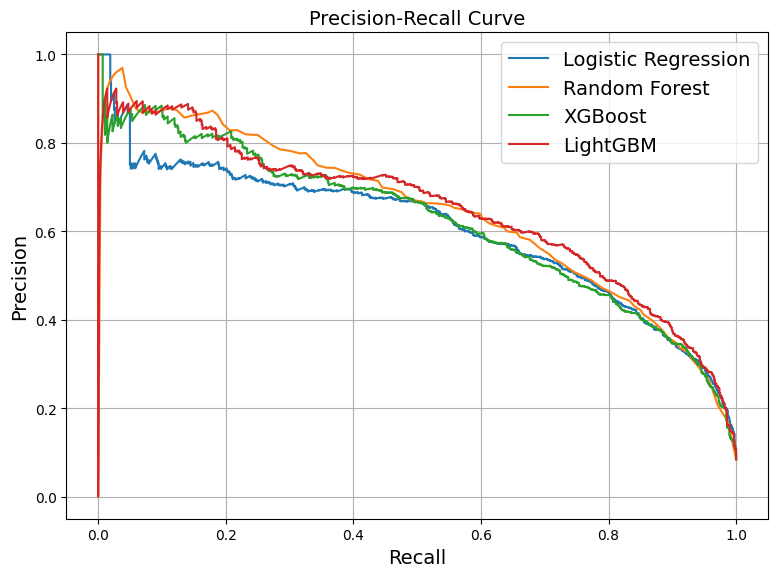

In [91]:
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    y_scores = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    plt.plot(recall, precision, label=f"{model_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
save_fig("precision_recall_curve")
plt.show()

**Insights from the PR Curve**
1. **Initial Dip**:  
   - Both **Random Forest (orange)** and **LightGBM (red)** show a sharp dip at very low recall values before stabilizing.  
   - This indicates that both models initially struggle with precision at extreme recall values.

2. **Performance Comparison**:  
   - **Random Forest and LightGBM alternate in leading performance**:
     - At certain recall values, **Random Forest exhibits higher precision**.
     - At other points, **LightGBM surpasses Random Forest**.
   - This suggests that their performance is closely matched and fluctuates based on recall.

3. **General Trends**:  
   - **LightGBM and XGBoost (green) have similar trends**, but LightGBM slightly outperforms at times.
   - **Logistic Regression (blue) lags behind** in precision across most recall values.
   - The overall shape of the curves suggests that tree-based ensemble methods (Random Forest, XGBoost, LightGBM) provide superior performance over logistic regression.



####7.7 Confusion Matrix Analysis

- The confusion matrices illustrate the classification performance of different models.
- **LightGBM** has the best balance between false positives and false negatives.
- **Random Forest** performs well but has slightly more misclassifications.
- **XGBoost** is competitive but not the best performer.
- **Logistic Regression** struggles the most, with a higher number of misclassified samples.


In [92]:
def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for idx, (model_name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["No Vote", "Vote"],
                    yticklabels=["No Vote", "Vote"], ax=axes[idx])

        axes[idx].set_xlabel("Predicted")
        axes[idx].set_ylabel("Actual")
        axes[idx].set_title(f"Confusion Matrix - {model_name}")
        fig.savefig(IMAGES_PATH / f"confusion_matrix_{model_name}.png", dpi=300, bbox_inches="tight")


    plt.tight_layout()
    plt.show()

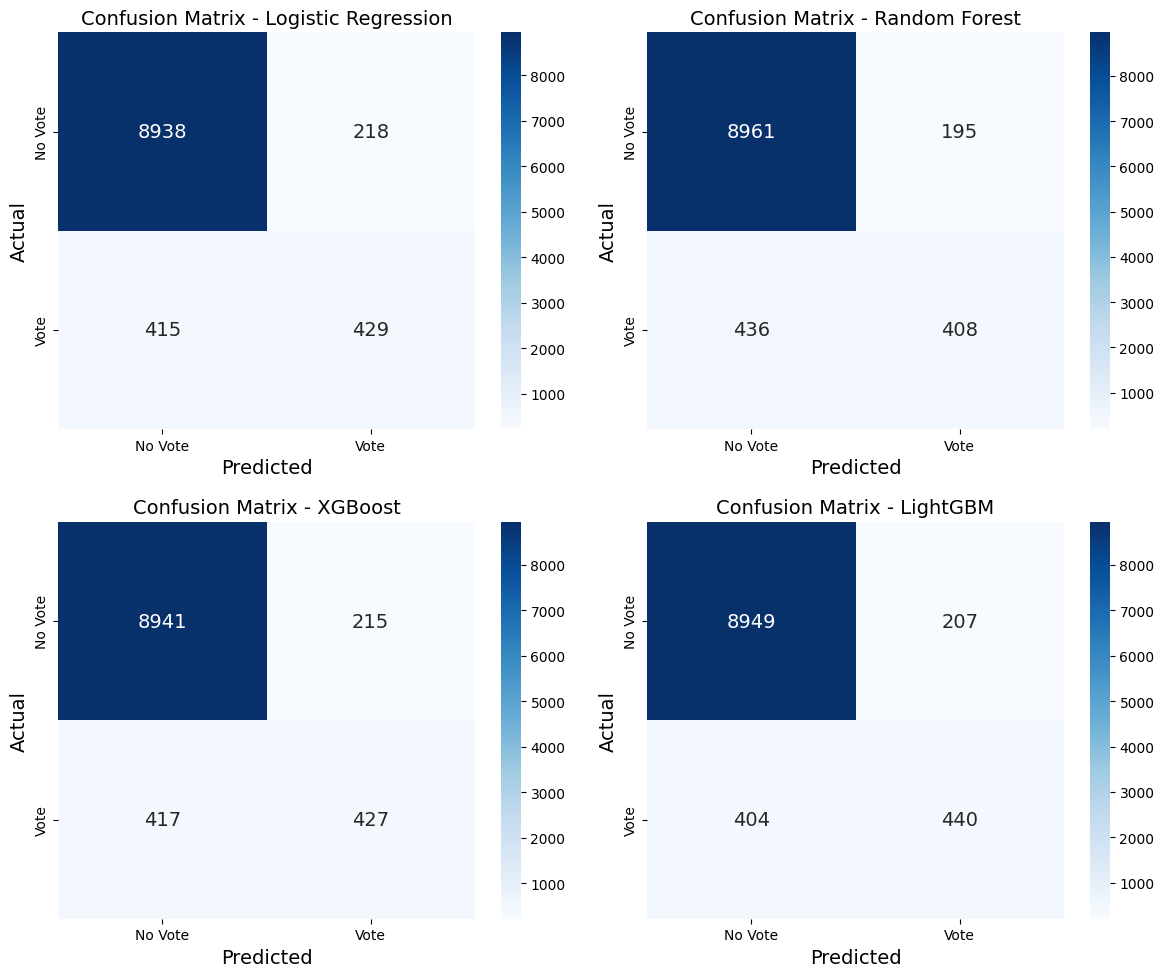

In [93]:
plot_confusion_matrices(models, X_test_scaled, y_test)

- LightGBM is the best-performing model. It achieves the highest AUC-ROC and F1-Score, which are the most important metrics for this task, especially if the dataset is imbalanced (e.g., fewer voters than non-voters).

- While Random Forest matches LightGBM in accuracy, it falls short in AUC-ROC and F1-Score, making LightGBM the superior choice.

- XGBoost is a close second but does not outperform LightGBM in any metric.

- Logistic Regression, while simple and interpretable, lags behind in all metrics.

###8. Hyperparameter Tuning for LightGBM


####8.1 **Parameter Grid (`param_grid`):**
The `param_grid` dictionary defines the range of hyperparameters to search for the best model performance:


In [94]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30]
}

####8.2. Grid Search Execution:

- The model is trained and validated using **3-fold cross-validation**.
- The best hyperparameters are selected based on the **highest AUC-ROC score**.
- Parallel computation is used to speed up training.

In [95]:
lgbm = LGBMClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Number of positive: 3531, number of negative: 36469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088275 -> initscore=-2.334881
[LightGBM] [Info] Start training from score -2.334881
Best Parameters: {'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 500, 'num_leaves': 31}
Best AUC-ROC Score: 0.943538320378007


####8.3. Final Model Training**
- The model is retrained using the **best hyperparameters** from Grid Search.
- The optimized LightGBM model is then fitted to the **scaled training dataset**.
- The trained model is used for predictions on the test dataset.

In [96]:
best_params = grid_search.best_params_

final_model = LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_train_scaled, y_train)


[LightGBM] [Info] Number of positive: 3531, number of negative: 36469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088275 -> initscore=-2.334881
[LightGBM] [Info] Start training from score -2.334881


LGBMClassifier(learning_rate=0.01, min_child_samples=10, n_estimators=500,
               random_state=42)

####8.4. **Model Predictions**
- The model outputs **binary predictions** (vote or no vote).
- It also provides **probability scores** for each prediction.

In [97]:
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:, 1]


####8.4 **Feature Importance Analysis**
- The **feature importances** of the trained model are extracted and analyzed.
- The **top 20 most important features** influencing voter turnout predictions are visualized.
- This helps interpret the key drivers behind the model's decision-making.


In [98]:
feature_importances = final_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
})

top_20_features = importance_df.sort_values(by="Importance", ascending=False).head(20)

####8.5 Visualization Horizontal Barplot of Key Features
A **bar plot** is used to display the **top 20 features** ranked by their importance scores.


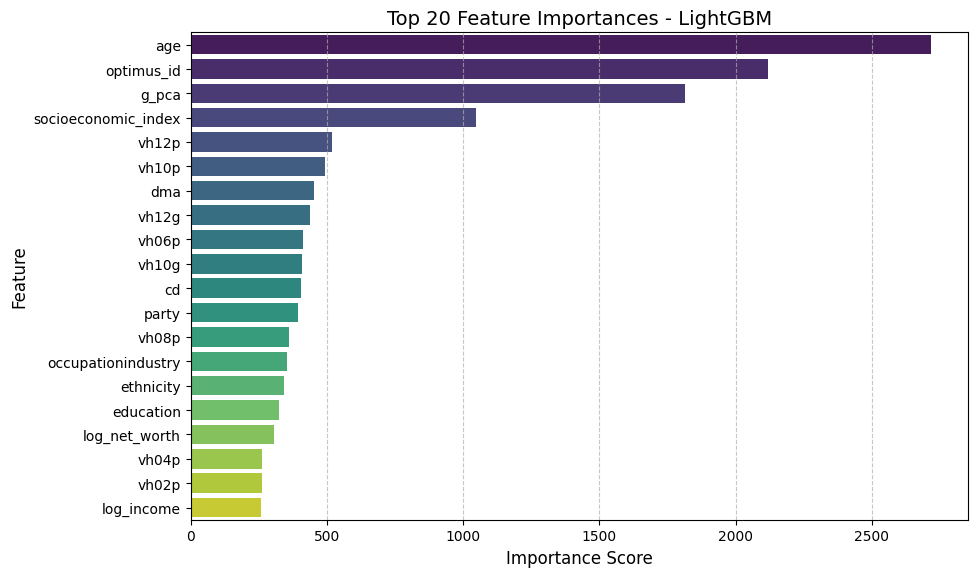

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=top_20_features,
    palette="viridis"
)

plt.title("Top 20 Feature Importances - LightGBM", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
save_fig("feature_importance_lightgbm")
plt.show()


**Insights from Feature Importance (LightGBM)**  

- **Age is the most influential factor** in predicting voter turnout, indicating that older individuals may have different voting behaviors compared to younger ones.  
- **Optimus ID and g_pca rank highly**, suggesting potential correlations with key demographic or behavioral patterns.  
- **Socioeconomic index plays a significant role**, highlighting the impact of economic status on voter participation.  
- **Past voting behavior features (vh12p, vh10p, etc.)** are strongly relevant, reinforcing the idea that previous voting history is a strong predictor of future turnout.  
- **Demographic and socioeconomic factors like education, ethnicity, and occupation/industry** also contribute to the model’s predictions.  
- **Log income and net worth appear lower on the list**, but they still play a role, suggesting a moderate relationship between financial status and voting likelihood.  


###9. **Outputs**

####9.1 Creating the Output DataFrame
After making predictions using the trained LightGBM model, a new **output DataFrame** is created to store the results. This DataFrame includes:
- The test set feature values (`X_test`).
- The corresponding **unique voter ID** (`optimus_id`), mapped from the original dataset.
- The **predicted voting outcome** (`vote`), which indicates whether a voter is likely to vote.
- The **predicted probability of voting** (`vote_prob`), obtained from the model’s probability estimates.
- Historical voting behavior (`vh14p`), retained for reference.

In [103]:
output_df = X_test.copy()
output_df['optimus_id'] = df.loc[X_test.index, 'optimus_id']
output_df['vote'] = y_pred
output_df['vote_prob'] = y_pred_prob
output_df['vh14p'] = df.loc[output_df.index, 'vh14p']

####9.2. Contents of the Exported CSV File
The final exported dataset consists of the following key columns:

| Column Name  | Description |
|--------------|------------|
| `optimus_id` | Unique identifier for each voter. |
| `age` | Age of the voter. |
| `vh14p` | Voting history from 2014. |
| `vh12g` | Voting history from 2012. |
| `vote` | Model-predicted voter turnout (1 = vote, 0 = no vote). |
| `vote_prob` | Probability score indicating likelihood of voting. |

In [105]:
output_df = output_df[['optimus_id', 'age', 'vh14p', 'vh12g', 'vote', 'vote_prob']]

output_df.to_csv("predicted_voter_turnout.csv", index=False)


### 9. Conclusion
- **LightGBM is the best-performing model**, achieving the highest AUC-ROC and F1-Score.
- **Hyperparameter tuning significantly improves model performance**.
- **Feature importance analysis reveals key factors influencing voter behavior**.
- **Predictions can be used for targeted voter engagement and further research**.